In [14]:
# imports
import pandas as pd
import networkx.convert_matrix
import networkx as nx

In [ ]:
# Load data

data_path = "/Users/bogart-MBP-isri/Dropbox/research/dev-migration/data/notebook/"
# I. Ecosystem Influence table
#   from_eco, to_eco, year, influence, scaled_influence, commit_count
eco_influence = pd.read_csv(data_path + "/eco_influence.csv")
eco_influence.set_index("from_eco,to_eco,year".split(","),inplace=True)
other_eco_links = eco_influence.index.get_level_values("to_eco") != eco_influence.index.get_level_values("from_eco")
#  EXAMPLE USE: eco_influence[otherlinks].loc[("Eclipse",slice(None),2012),"scaled_influence"].idxmax()
#      (Biggest destination of influence from Eclipse in 2012)

In [ ]:
# II. Package influence table
#   from_eco, year, in_eco, package, repo, influence, scaled_influence, influence_high, commit_count_package, commit_count_eco
package_influence = pd.read_csv(data_path + "/package_influence.csv.gz",compression='gzip')
package_influence.set_index("from_eco,in_eco,package,year".split(","),inplace=True)
package_influence.sort_index(inplace=True)
other_pkg_links = package_influence.index.get_level_values("in_eco") != package_influence.index.get_level_values("from_eco")

In [110]:
# III. Ecosystem practice table
#   eco, year, vstyle1..N, dstyle1..N, ver_update_major, ver_update_minor, ver_update_patch, ver_update_supermajor,
#        ver_update_backport, release_frequency, dep_update_frequency, dep_count, new_dep_count, mean_deps_updated,
#        mean_proportion_deps_updated
ecosystem_practices = pd.read_csv(data_path + "/ecosystem_practices.csv")#,compression='gzip')
ecosystem_practices.set_index("eco,year".split(","),inplace=True)
ecosystem_practices.sort_index(inplace=True)

In [ ]:
# IV. Package Practices 
#     eco, package, year, vstyle1..N, dstyle1..N, ver_update_major, ver_update_minor, ver_update_patch, ver_update_supermajor,
#        ver_update_backport, release_frequency, dep_update_frequency, dep_count, new_dep_count, mean_deps_updated,
#        mean_proportion_deps_updated
#     +_by_commit_size suffix for versions&dependencies,
package_practices = []
package_practices = pd.read_csv(data_path + "/package_practices.csv")#,compression='gzip')
package_practices.set_index("eco,package,year".split(","),inplace=True)
package_practices.sort_index(inplace=True)

In [108]:
# IVa. Package covariates
#     eco, package, year, reverse_dependencies, age, developers, commits, owners_experience, average_experience
package_covariates = []

# V. Author Influence 
#     author, year, from_eco, to_eco, influence, scaled_influence
author_influence = []

# Va. Author practices 
#     author, year, month, eco, vstyle1..N, dstyle1..N, ver_update_major, ver_update_minor, ver_update_patch, ver_update_supermajor,
#        ver_update_backport, release_frequency, dep_update_frequency, dep_count, new_dep_count, mean_deps_updated,
#        mean_proportion_deps_updated
author_practices = []

# Vb. Author Covariates 
#    author, year, from_eco, to_eco, from_commits, to_commits, from_package_count, to_package_count,
#    NB: the "to" fields here match the year; the "from" fields sum the previous 3 years
author_covariates = []

In [107]:
# Analysis 1: Overall flow of people   ECO_INFLUENCE

# Show table of influence percentages

infl = eco_influence.loc[(slice(None),slice(None),2015),"scaled_influence"].sort_index().unstack(level=1)
infl.applymap(lambda k: str(int(k*100+.5)) + "%" if k>.015 else "")

# Calculate highest flow in for each ecosystem/year
# Distribution of flows overall
# Map for a few highlighted years
# Describe and comment

,to_eco,Atom,CPAN,CRAN,Cargo,CocoaPods,Go,Hackage,Hex,Maven,NPM,NuGet,Packagist,Pypi,Rubygems,Stackage
from_eco,year,,,,,,,,,,,,,,,
Atom,2015,28%,,,,,,,,,,,,,,
Bioconductor,2015,,,,,,,,,,,,,,,
CPAN,2015,,94%,,,,,,,,,,,,,
CRAN,2015,,,85%,,,,,,,,,,,,
Cargo,2015,,,,52%,,,,,,,,,,,
CocoaPods,2015,,,,,60%,,,,,,,,,,
Eclipse,2015,8%,4%,11%,23%,12%,22%,12%,27%,35%,11%,13%,3%,14%,15%,11%
Go,2015,2%,,,4%,4%,56%,4%,,,,2%,,3%,2%,9%
Hackage,2015,,,,,2%,,54%,,,,,,,,43%


In [ ]:
# Analysis 2: Practice contrasts   ECO_PRAX, PACKAGE_PRAX

# Ecosystem-level distributions of practice in some year(s)

# Ecosystem-level trends of practice
# Highlight interesting outliers

# Identify focal cases -- practice contrasts, changing, in which there's human flow 

In [ ]:
# Analysis 3:   PACKAGE_PRAX, ECO_PRAX, PACKAGE_INFLUENCE, PACKAGE_COVARIATES

# RQ: are high-influence packages influenced by the source ecosystem?
# Package-level model, within a year:
#   prax ~ to_eco_mean * to_eco_infl + eco1_mean * eco1_infl + eco2_mean*eco2_infl + ... + age + devs + commits + owners_experience
# The particular ecosystems are random effects EXCEPT to_eco_mean


# SCRATCH -- Nothing below this line counts

In [ ]:
package_practices

In [ ]:
eco_influence.loc[("CRAN",slice(None),2012),"scaled_influence"].idxmax(axis=0)

In [ ]:
#eco_influence[otherlinks].loc[("Eclipse",slice(None),2012),"scaled_influence"].idxmax()

In [ ]:
eco_influence

In [ ]:
eco_influence.loc[(slice(None),slice(None),2015),"scaled_influence"].idxmax(axis=0)

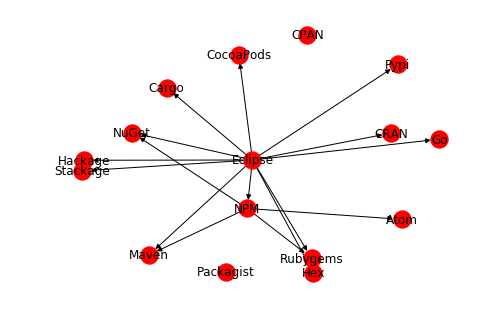

In [25]:
to_show = eco_influence.reset_index()
to_show = to_show[to_show.year==2015]
to_show = to_show[to_show.scaled_influence > 0.1]
gr = networkx.convert_matrix.from_pandas_edgelist(to_show,
                             source='from_eco',target="to_eco",edge_attr="scaled_influence", create_using = nx.DiGraph())
%matplotlib inline
nx.draw(gr, with_labels=True)

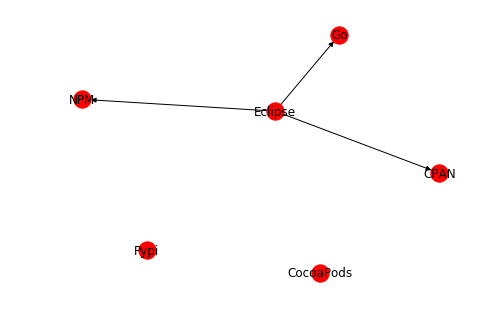

In [29]:
to_show = eco_influence.reset_index()
to_show = to_show[to_show.year==1996]
to_show = to_show[to_show.scaled_influence > 0.1]
gr = networkx.convert_matrix.from_pandas_edgelist(to_show,
                             source='from_eco',target="to_eco",edge_attr="scaled_influence", create_using = nx.DiGraph())
%matplotlib inline
nx.draw(gr, with_labels=True)

In [31]:
to_show = eco_influence.reset_index()
to_show[to_show.year==1996]

,from_eco,to_eco,year,influence,scaled_influence,commit_count
468,NPM,CocoaPods,1996,0,0.000000,5
469,Cargo,CocoaPods,1996,0,0.000000,5
470,Rubygems,CocoaPods,1996,0,0.000000,5
471,NuGet,CocoaPods,1996,0,0.000000,5
472,Lua,CocoaPods,1996,0,0.000000,5
473,Hex,CocoaPods,1996,0,0.000000,5
474,Eclipse,CocoaPods,1996,0,0.000000,5
475,Hackage,CocoaPods,1996,0,0.000000,5
476,Maven,CocoaPods,1996,0,0.000000,5
477,Bioconductor,CocoaPods,1996,0,0.000000,5


TypeError: 'range' object cannot be interpreted as an integer

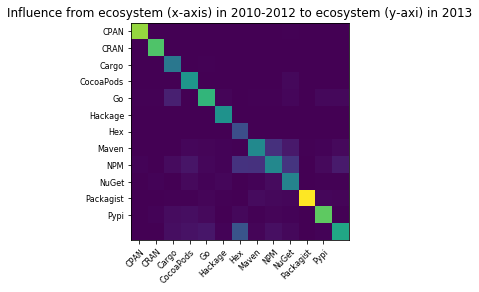

In [87]:
ecos = ["CPAN","CRAN","Cargo","CocoaPods","Go","Hackage","Hex","Maven","NPM","NuGet","Packagist","Pypi","Rubygems"]
infl = eco_influence.loc[(ecos,ecos,2013),"scaled_influence"].sort_index().unstack(level=1)

%matplotlib inline
#infl.imshow()
from matplotlib import pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(infl, interpolation="none")
ax1.set_xticks(range(0,infl.columns.values.size-1))
ax1.set_yticks(range(0,infl.index.levels[0].values.size-1))
ax1.set_xticklabels(infl.columns.values,fontsize=8)
ax1.set_yticklabels(infl.index.levels[0].values,fontsize=8)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax1.set_title("Influence from ecosystem (x-axis) in 2010-2012 to ecosystem (y-axi) in 2013")
for i in range(range(0,infl.columns.values.size-1)):
    for j in range(range(0,infl.index.levels[0].values.size-1)):
        text = ax1.text(j, i, infl.iloc[i, j],
                       ha="center", va="center", color="w")

fig.tight_layout()
infl

In [67]:
infl.index.levels[0].values.size

18

In [76]:
infl.columns.values

array(['Atom', 'CPAN', 'CRAN', 'Cargo', 'CocoaPods', 'Go', 'Hackage',
       'Hex', 'Maven', 'NPM', 'NuGet', 'Packagist', 'Pypi', 'Rubygems',
       'Stackage'], dtype=object)

In [111]:

'dep_situation_altered_per_year_proportion',
       'dep_form_file#commit_count', 'add_dep_proportion',
       'dep_form_URL#commit_count', 'dep_form_upperbounded_proportion',
       , 'dep_form_URL_proportion',
       'total_deps_count', 'reverse_dependencies_proportion', 'outof',
       'dep_form_URL#branch_proportion', 'version_form_0.0_proportion',
       'alpha_proportion', 'dep_form_URL_count', 'dep_form_URL#branch_count',
       'dep_form_atleast_proportion', 'version_form_0_proportion',
       'version_form_other_proportion', 'same_count', 'dep_form_other_count',
       'patch_proportion', 'patch_count', 'major_count',
       'dep_form_package#commit_proportion', 'backport_count',
       'subsubpatch_count', 'package_count', 'reverse_dependencies_count',
       'first_count', 'dep_form_package#branch_count',
       'dep_situation_altered_per_year_count',
       'dep_form_URL#commit_proportion',
       'dep_constraint_changes_per_year_count', 'dep_form_upperbounded_count',
       'dep_form_exact_count', 'dep_form_latest_proportion',
       'dep_form_nonmajor_proportion', 'dep_form_other_proportion',
       'version_form_other_count', 'version_form_0.0.0_count', 'release_count',
       'dep_form_file#commit_proportion', 'dep_form_exact_proportion',
       'release_proportion', 'dep_form_file#branch_proportion',
       'major_proportion', 'version_form_0_count', 'dep_form_atleast_count',
       'backport_proportion', 'dep_form_package#branch_proportion',
       'version_form_0.0.0_proportion', 'total_deps_proportion',
       'dep_form_package#commit_count', 'minor_count',
       'deps_added_per_year_count', 'dep_form_latest_count',
       'version_form_0.0.0.0_count', 'subsubpatch_proportion', 'add_dep_count',
       'version_form_0.0_count', 'change_dep_proportion',
       'subpatch_proportion', 'same_proportion', 'total_commits',
       'subpatch_count', 'alpha_count', 'minor_proportion', 'change_dep_count',
       'dep_form_nonmajor_count', 'average_commits',
       'dep_form_file#branch_count', 'deps_added_per_year_proportion',
       'dep_constraint_changes_per_year_proportion', 'first_proportion',
       'commits'],
    focal_practices = {
    "dep_openness": ["add_dep_proportion", ]
    "dep_fixedness": ['version_form_0.0.0.0_proportion',]
    "dep_semver_trust":
    "unused": []
}
ecosystem_practices.loc[(Slice(None),Slice(None),focal_practices]

dep_situation_altered_per_year_proportion  \
eco      year                                              
Atom     2010                                   0.000000   
         2011                                   0.000000   
         2012                                   0.000000   
         2013                                   0.000000   
         2014                                   0.000000   
         2015                                   1.939459   
         2016                                   1.152943   
         2017                                   1.555247   
         2018                                   0.843801   
CPAN     1995                                   0.000000   
         1996                                   0.000000   
         1997                                   0.000000   
         1998                                   0.000000   
         1999                                   0.000000   
         2000                                   0.000000   
         2001                                   0.000000   
         2002                                   0.021546   
         2003                                   0.724017   
         2004                                   1.359979   
         2005                                   1.614884   
         2006                                   1.623432   
         2007                                   1.911765   
         2008                                   2.408699   
         2009                                   2.859513   
         2010                                   3.134294   
         2011                                   3.193230   
         2012                                   3.367822   
         2013                                   4.413810   
         2014                                   5.025274   
         2015                                   4.779893   
...                                                  ...   
Rubygems 2007                                   0.888199   
         2008                                   1.488291   
         2009                                   2.386198   
         2010                                   2.669613   
         2011                                   3.662210   
         2012                                   3.308626   
         2013                                   3.506719   
         2014                                   3.433258   
         2015                                   3.881350   
         2016                                   3.590226   
         2017                                   3.597649   
         2018                                   1.949745   
Stackage 2001                                   0.000000   
         2002                                   0.000000   
         2003                                   0.000000   
         2004                                   0.000000   
         2005                                   0.000000   
         2006                                   0.000000   
         2007                                   0.000000   
         2008                                   0.000000   
         2009                                   0.000000   
         2010                                   0.000000   
         2011                                   0.000000   
         2012                                   0.000000   
         2013                                   0.000000   
         2014                                   0.000000   
         2015                                   0.000000   
         2016                                   0.000000   
         2017                                   0.000000   
         2018                                   0.000000   

               dep_form_file#commit_count  add_dep_proportion  \
eco      year                                                   
Atom     2010                           0            0.000000   
         2011                          

In [105]:
69+28

97

In [112]:
ecosystem_practices.columns

Index(['dep_situation_altered_per_year_proportion',
       'dep_form_file#commit_count', 'add_dep_proportion',
       'dep_form_URL#commit_count', 'dep_form_upperbounded_proportion',
       'version_form_0.0.0.0_proportion', 'dep_form_URL_proportion',
       'total_deps_count', 'reverse_dependencies_proportion', 'outof',
       'dep_form_URL#branch_proportion', 'version_form_0.0_proportion',
       'alpha_proportion', 'dep_form_URL_count', 'dep_form_URL#branch_count',
       'dep_form_atleast_proportion', 'version_form_0_proportion',
       'version_form_other_proportion', 'same_count', 'dep_form_other_count',
       'patch_proportion', 'patch_count', 'major_count',
       'dep_form_package#commit_proportion', 'backport_count',
       'subsubpatch_count', 'package_count', 'reverse_dependencies_count',
       'first_count', 'dep_form_package#branch_count',
       'dep_situation_altered_per_year_count',
       'dep_form_URL#commit_proportion',
       'dep_constraint_changes_per_year_coun

In [118]:
sum(ecosystem_practices.backport_proportion)

14.181084499297466

In [127]:
ecosystem_practices.loc[("CPAN",2015),["outof","major_proportion","major_count"]]

outof               10872.000000
major_proportion        0.035228
major_count           383.000000
Name: (CPAN, 2015), dtype: float64

In [128]:
package_practices.head()

NameError: name 'package_practices' is not defined